# 03 Algorithms

## 3.11.A Temporal-Difference Learning with Value Function Approximation

### Value Function Approximation
在此之前，我们介绍的的Model-Based和Model-Free的算法，都是基于表格的形式来存储值函数。然而在实际应用中，状态空间往往是连续且高维的，使用表格形式存储值函数是不现实的。因此我们需要引入Value Function Approximation的方法来进行近似计算。

**Value Function Approximation的目的：**
- 一般地，近似函数的参数的参数要远小于样本数，也小于状态-动作对的数量（即表格的大小），因此可以大大减少存储空间的需求；
- 近似函数可以对于未被访问到的状态和动作进行价值计算，提高求解效率；
- 可以是线性的也可以是非线性的，可以处理具有连续、高维的状态空间和动作空间的问题。



### Temporal-Difference Learning with Value Function Approximation

**首先**，定义近似函数的目标函数：
$$
J(w) = \mathbb{E} [(v_{\pi} (S) - \hat{v}(S, w))^2]
$$
其中，$v_{\pi}$ 是状态的真实价值函数，$\hat{v}(S, w)$ 是我们近似的价值函数。我们的目标是最小化这个误差平方和。

**其次**，目标函数关于$w$的梯度为：
$$
\nabla J(w) = \mathbb{E} [2 (v_{\pi}(S) - \hat{v}(S, w)) \cdot (-\frac{\partial \hat{v}(S, w)}{\partial w})]
$$
简化后得到：
$$
\nabla J(w) = -\mathbb{E} [2 (v_{\pi}(S) - \hat{v}(S, w)) \cdot \frac{\partial \hat{v}(S, w)}{\partial w}]
$$

**进一步地**，采用随机梯度下降算法进行求解：
$$
w_{t+1} = w_t + \alpha_t (v_{\pi}(s_t) - \hat{v}(s_t, w)) \cdot \frac{\partial \hat{v}(s_t, w_t)}{\partial w}
$$
其中，$\alpha_t$是学习率，表示$2 \cdot \alpha_t$。

**然而，在上面的迭代公式并不能直接被使用，因为我们并不知道$v_{\pi}(s_t)$的值。**

因此，我们需要估计$v_{\pi}(s_t)$的值。通常有两种办法对$v_{\pi}(s_t)$进行估计：

1. 一个常用的方法是采用蒙特卡洛方法来估计$v_{\pi}(s_t)$的值。具体来说，我们可以通过多次采样得到一系列的状态-动作对$(s_t, a_t)$，然后计算每个状态-动作对的回报值，最后取平均值作为$v_{\pi}(s_t)$的估计值，表示如下（$g_t$表示在一个采样序列episode中从$t$时刻开始的截断回报值）：
   $$
   w_{t+1} = w_t + \alpha_t (g_t - \hat{v}(s_t, w)) \cdot \frac{\partial \hat{v}(s_t, w_t)}{\partial w}
   $$
2. 另一种方法是采用时序差分方法来估计$v_{\pi}(s_t)$的值。具体来说，我们可以通过当前的状态$s_t$和动作$a_t$以及下一个状态$s_{t+1}$和$r_{t+1}$来估计$v_{\pi}(s_t)$的值，即使用TD Target来近似$v_{\pi}(s_t)$。表示如下：
   $$
   w_{t+1} = w_t + \alpha_t [(r_{t+1} + \gamma \hat v(s_{t+1}, w_t)) - \hat{v}(s_t, w)] \cdot \frac{\partial \hat{v}(s_t, w_t)}{\partial w}
   $$

**值得一提**的是，采用时序差分近似的方法并不是在求解
$$
J(w) = \mathbb{E} [(v_{\pi} (S) - \hat{v}(S, w))^2] = ||\hat{v}(s, w) - v_{\pi}(s)||_D^2
$$
而是在求解：
$$
J_{PBE}(w) = ||\hat{v}(s, w) - M(r_{\pi}(s) + \gamma P_{\pi}\hat{v}(s_{t+1}, w))||_D^2 = || \hat{v}(s, w) - MT_{\pi}(\hat v(s_{t+1}, w)) ||_D^2
$$
其中，$r_{\pi}(s)$是策略$\pi$的期望回报，$ T_{\pi}(\hat v(s_{t+1}, w)) = r_{\pi}(s) + \gamma \hat{v}(s_{t+1}, w)$，$M$是一个映射矩阵。




### Temporal-Difference Learning with Value Function Approximation Algorithm
目标：近似计算给定策略$\pi$的状态价值函数$v_{\pi}(s)$
- 初始化价值函数近似器$\hat{v}(s, w)$，其中$w$是权重向量
- 对于每一个遵循策略$\pi$生成的episode：
  - 对于每一个时间步$t$，利用$(s_t, r_{t+1}, s_{t+1})$更新权重向量$w$：
    - $w_{t+1} = w_t + \alpha_t [(r_{t+1} + \gamma \hat v(s_{t+1}, w_t)) - \hat{v}(s_t, w_t)] \cdot \frac{\partial \hat{v}(s_t, w)}{\partial w}$

### Sarsa with Function Approximation Algorithm
目标：搜索一个能够引导智能体从初始状态到达目标状态的策略
- 初始化价值函数近似器$\hat{q}(s, a, w)$、策略$\pi(s)$、步长$\alpha$、折扣因子$\gamma$和探索率$\epsilon$
- 对于每一个episode:
- $\qquad$ 遵循策略$\pi_0(s_0)$在$t_0$时刻生成动作$a_0$
- $\qquad$ 如果$s_t(t=0,1,2,\cdots)$不是目标状态，则：
- $\qquad\qquad$ 给定$(s_t,a_t)$采样得到$(r_{t+1},s_{t+1}, a_{t+1})$，其中$a_{t+1}$遵循$\pi_t(s_{t+1})$
- $\qquad\qquad$ 更新参数：$w_{t+1} = w_t + \alpha_t [(r_{t+1} + \gamma \hat q(s_{t+1}, a_{t+1}, w_t)) - \hat{q}(s_t,a_t, w_t)] \cdot \frac{\partial \hat{v}(s_t, a_t w)}{\partial w}$
- $\qquad\qquad$ 更新策略：如果$a = \arg\max_a q_{t+1}(s_t, a)$， $\pi_{t+1}(a|s_t)=1-\frac{\epsilon}{|\cal A(s_t)|}(|\cal A(s_t)| - 1)$，否则$\pi_{t+1}(a|s_t) = \frac{\epsilon}{|\cal A(s_t)|}$
- $\qquad$ $s_t \leftarrow s_{t+1}$, $a_t \leftarrow a_{t+1}$

### Q-Learning with Function Approximation Algorithm (on-policy version)
目标：搜索一个能够引导智能体从初始状态到达目标状态的优化策略
- 初始化价值函数近似器$\hat{q}(s, a, w)$、策略$\pi(s)$、步长$\alpha$、折扣因子$\gamma$和探索率$\epsilon$
- 对于每一个episode:
- $\qquad$ 遵循策略$\pi_0(s_0)$在$t_0$时刻生成动作$a_0$
- $\qquad$ 如果$s_t(t=0,1,2,\cdots)$不是目标状态，则：
- $\qquad\qquad$ 给定$(s_t,a_t)$采样得到$(r_{t+1},s_{t+1}, a_{t+1})$，其中$a_{t+1}$遵循$\pi_t(s_{t+1})$
- $\qquad\qquad$ 更新参数：$w_{t+1} = w_t + \alpha_t [(r_{t+1} + \gamma \max_{a \in \cal A(s_{t+1})} \hat q(s_{t+1}, a, w_t)) - \hat{q}(s_t,a_t, w_t)] \cdot \frac{\partial \hat{v}(s_t, a_t, w)}{\partial w}$
- $\qquad\qquad$ 更新策略：如果$a = \arg\max_a q_{t+1}(s_t, a)$， $\pi_{t+1}(a|s_t)=1-\frac{\epsilon}{|\cal A(s_t)|}(|\cal A(s_t)| - 1)$，否则$\pi_{t+1}(a|s_t) = \frac{\epsilon}{|\cal A(s_t)|}$
- $\qquad$ $s_t \leftarrow s_{t+1}$, $a_t \leftarrow a_{t+1}$

## 3.11.B Deep Q-Network

### Deep Q-Network

Deep Q-Network的目标函数是：
$$
J(w) = \mathbb E \left[ (R + \gamma \max_{a \in \cal A(S)} \hat q (S', a, w) - \hat q (S, A, w))^2 \right]
$$

我们使用两个神经网络来进行目标函数求解：
- Current Network：用来估计$\hat q(S, A, w)$;
- Target Network：用来估计$\hat q(S', a, w)$。

因此，目标函数可以退化为：
$$
J(w) = \mathbb E \left[ (R + \gamma \max_{a \in \cal A(S)} \hat q (S', a, w_T) - \hat q (S, A, w))^2 \right]
$$

其中，$w_T$是目标网络的参数。

在实际操作中，我们通常每隔一定步数内固定Target Network的参数$w_T$，然后每隔一定步数将Current Network的参数复制给目标网络，即：$w_T \leftarrow w$。这样做的目的是为了保证训练的稳定性。

另外，一个非常中药的技巧是**经验回放**，它可以让智能体在一次次的实验中积累经验，然后利用这些经验来训练模型。具体来说，我们可以将智能体的经历（即$(s, a, r, s')$）存储在一个经验池$\mathcal{B} = \{(s, a, r, s')\}_{i=1}^{N}$中，然后在每次训练时从经验池中随机抽取一批数据来进行训练。这样可以有效减少样本之间的相关性，从而提高模型的泛化能力。

### Deep Q-Network (DQN) Algorithm (off-policy version)

目标：从遵循行为策略$\pi_behavior$生成的经验数据中学习一个目标网络，用于近似最优动作价值函数$Q(s, a)$
- 初始化：一个是当前的Q值网络($Q_{w}$)，另一个是目标网络($Q_{w'}$)、行为策略($\pi_behavior$)和$\mathcal{B} = \{(s, a, r, s')\}_{i=1}^{N}$、目标网络更新频率$C$、步长$\alpha$、折扣因子$\gamma$和探索率$\epsilon$
- 存储经验数据：从环境中采样得到$(s, a, r, s')$，并存入$\mathcal{B}$中
  - 对于每一次迭代：
    - 从经验回放池中随机抽取一批经验数据$\{(s, a, r, s')\}_{i=1}^{B}$，其中$B$是批量大小;
    - 计算目标Q值：计算目标Q值$y_T = r + \gamma \max_{a \in \cal A(s')} Q_{w'}(s', a')$，其中$r$是奖励，$\gamma$是折扣因子;
    - 计算损失函数：计算损失函数$L = (y_T - Q_{w}(s, a))^2$;
    - 更新Current Network：使用梯度下降法更新Current Network的参数，即$w \leftarrow w + \alpha \nabla_w L$;
  - 更新Target Network：定期将当前Q值网络的参数复制到目标网络中，即$w' \leftarrow w$，更新频率为$C$

### Example

In [1]:
import time
import random
import collections

import torch
import torch.nn as nn
import numpy as np
import gymnasium as gym
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
class ReplayBuffer:
    """ Experience Replay Buffer """

    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)


    def add(self, state, action, reward, next_state, done):
        """ Add Experience to Buffer """

        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        """ Sample a Batch of Experiences from Buffer """

        transitions = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = zip(*transitions)
        return np.array(state), action, reward, np.array(next_state), done

    def size(self):
        """ Return the Size of Buffer """

        return len(self.buffer)

In [3]:
class Qnetwork(nn.Module):
    """ Deep Q-Network """

    def __init__(self, state_dim, hidden_dim, action_dim):
        super(Qnetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, action_dim)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        return self.fc3(x)

In [4]:
class DeepQNetwork:
    """ Deep Q-Network Algorithm """

    def __init__(self, env, state_dim, action_dim, hidden_dim=64, learning_rate=0.01, gamma=0.99, epsilon=0.1, epsilon_decay=0.99, target_update_freq=2, device=None, buffer_capacity=10000):
        """ Initialize Deep Q-Network """

        self.env = env
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.hidden_dim = hidden_dim
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.target_update_freq = target_update_freq

        self.device = device
        if self.device is None:
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Initialize buffer
        self.replay_buffer = ReplayBuffer(capacity=buffer_capacity)

        self.current_network = Qnetwork(state_dim, hidden_dim, action_dim).to(device)
        self.target_network = Qnetwork(state_dim, hidden_dim, action_dim).to(device)
        self.optimizer = torch.optim.Adam(self.current_network.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()

        self.steps = 0
        self.returns = []

    def take_action(self, state):
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(self.action_dim)
        else:
            # Check if the state is empty or has the wrong shape
            if state is None or len(state) == 0 or len(state) != self.state_dim:
                raise ValueError(f"State is invalid: {state}")

            # Convert state to tensor
            state = torch.tensor(np.array([state]), dtype=torch.float32).to(self.device)

            # Ensure the state has the correct shape
            if state.shape != (1, self.state_dim):
                raise ValueError(f"State has incorrect shape: {state.shape}")

            # Get action from Q-network
            action = self.current_network(state).argmax().item()

        return action

    def update(self, batch):
        """ Update the Q-values using a batch of experiences """

        states = torch.tensor(batch['states'], dtype=torch.float32).to(self.device)
        actions = torch.tensor(batch['actions'], dtype=torch.long).to(self.device)
        rewards = torch.tensor(batch['rewards'], dtype=torch.float32).to(self.device)
        next_states = torch.tensor(batch['next_states'], dtype=torch.float32).to(self.device)
        dones = torch.tensor(batch['dones'], dtype=torch.float32).to(self.device)

        # Compute Q-values for the current states and actions
        current_q_values = self.current_network(states).gather(1, actions.view(-1, 1))
        # Compute max target Q-values for the next states using the target network
        max_target_q_values = self.target_network(next_states).max(axis=1)[0].view(-1, 1)
        # Compute the target Q-values using the Bellman equation with discount factor gamma and rewards
        targets = rewards.view(-1, 1) + self.gamma * max_target_q_values * (1 - dones.view(-1, 1))
        # Compute the loss using mean squared error between current Q-values and target Q-values
        loss = self.criterion(current_q_values, targets)
        # Backpropagate the loss and update the network parameters using Adam optimizer with learning rate lr
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        # Update the target network parameters using a soft update with tau factor to track slowly changing targets
        if self.target_update_freq > 0 and self.steps % self.target_update_freq == 0:
            self.target_network.load_state_dict(self.current_network.state_dict())

        self.steps += 1

    def train(self, epochs=100, batch_size=32):
        """ Train the DQN agent on the given number of epochs with a batch size """

        for i in range(10):
            with tqdm(total=epochs // 10, desc=f"Iteration {i+1}") as pbar:
                for epoch in range(epochs // 10):
                    state, info = self.env.reset()

                    done = False
                    gamma_power = 1
                    episode_return = 0
                    while not done:
                        action = self.take_action(state)
                        next_state, reward, terminated, truncated, info = self.env.step(action)
                        done = terminated or truncated
                        self.replay_buffer.add(state, action, reward, next_state, done)
                        state = next_state

                        episode_return += reward * gamma_power
                        gamma_power *= self.gamma

                        if self.replay_buffer.size() >= batch_size:
                            state_batch, action_batch, reward_batch, next_state_batch, done_batch = self.replay_buffer.sample(batch_size)

                            batch = {
                                "states": state_batch,
                                "actions": action_batch,
                                "rewards": reward_batch,
                                "next_states": next_state_batch,
                                "dones": done_batch
                            }
                            self.update(batch)

                    self.returns.append(episode_return)
                    if (epoch + 1) % 10 == 0:
                        pbar.set_postfix(
                            {
                                'epoch': epochs / 10 * i + epoch + 1,
                                'return': np.mean(self.returns),
                                'epsilon': self.epsilon
                            }
                        )
                    pbar.update(1)

                    self.epsilon *= self.epsilon_decay
                    self.epsilon = max(self.epsilon, 0.01)

In [5]:
name = 'CartPole-v1'
environment = gym.make(name, render_mode='rgb_array')
environment.reset()

(array([ 0.01179463,  0.02529363,  0.00950282, -0.01313173], dtype=float32),
 {})

In [6]:
agent = DeepQNetwork(
    env=environment,
    state_dim=environment.observation_space.shape[0],
    action_dim=environment.action_space.n,
    hidden_dim=128,
    learning_rate=0.001,
    gamma=0.98,
    epsilon=1,
    epsilon_decay=0.995,
    target_update_freq=10,
    buffer_capacity=10000,
    device=torch.device("mps" if torch.backends.mps.is_available() else "cpu")
)

In [7]:
agent.train(
    epochs=500,
    batch_size=128
)

Iteration 10: 100%|██████████| 50/50 [00:43<00:00,  1.15it/s, epoch=500, return=33.7, epsilon=0.082] 


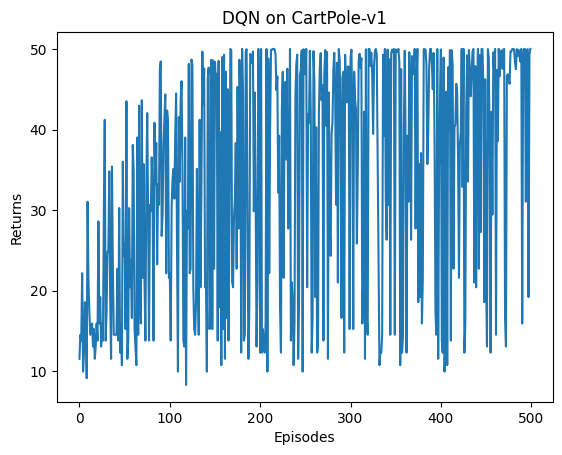

In [8]:
episodes = list(range(len(agent.returns)))
plt.plot(episodes, agent.returns)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('DQN on {}'.format(name))
plt.show()